### Data Set Comparison

#### Imports

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

#### DS-01

In [39]:
# Load DS-01 Fake and True news datasets
fake_news = pd.read_csv('./raw-data/raw-dataset-01/Fake.csv')
true_news = pd.read_csv('./raw-data/raw-dataset-01/True.csv')

# Create a single DataFrame for the separated datasets
fake_news['label'] = 0  # 0 is for fake news
true_news['label'] = 1  # 1 is for true news
dataset_01 = pd.concat([fake_news, true_news], ignore_index=True)

# Save the merged dataset as "dataset-01.csv"
dataset_01.to_csv('./raw-data/dataset-01.csv', index=False)

# Print column labels for dataset
print("Column Labels for Dataset 01:")
print(dataset_01.columns.tolist())

# Print the distribution of news types in dataset
print("News Type Distribution in Dataset 01:")
print(dataset_01['label'].value_counts())

Column Labels for Dataset 01:
['title', 'text', 'subject', 'date', 'label']
News Type Distribution in Dataset 01:
label
0    23481
1    21417
Name: count, dtype: int64


#### DS-02

In [38]:
# Load DS-02 Fake and True news datasets
file_path = './raw-data/raw-dataset-02.csv'
dataset_02 = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

# Check and rename the first column to 'index' if it's not already named so
dataset_02.columns = ['index'] + dataset_02.columns.tolist()[1:]

# Drop rows that are entirely empty and rows that do not start with a numeric index
dataset_02_cleaned = dataset_02.dropna(how='all')  # Drop rows where all elements are NaN
dataset_02_cleaned = dataset_02_cleaned[dataset_02_cleaned['index'].apply(lambda x: str(x).isdigit())]

# Keep only the explicitly named columns (assuming you know the column names you want to keep)
columns_to_keep = ['index', 'title', 'text', 'label']
dataset_02_cleaned = dataset_02_cleaned[columns_to_keep]

# Drop rows with any missing values in these columns
dataset_02_cleaned = dataset_02_cleaned.dropna()

# Convert 'label' to string, fliter and back to int
dataset_02_cleaned['label'] = dataset_02_cleaned['label'].astype(str)
dataset_02_cleaned = dataset_02_cleaned[dataset_02_cleaned['label'].isin(['0', '1'])]
dataset_02_cleaned['label'] = dataset_02_cleaned['label'].astype(int)

# Save the cleaned dataset or continue processing as needed
dataset_02_cleaned.to_csv('./raw-data/dataset-02.csv', index=False)

# Print column labels for dataset
print("Column Labels for Dataset 02:")
print(dataset_02_cleaned.columns.tolist())

# Print the distribution of news types in dataset
print("News Type Distribution in Dataset 02:")
print(dataset_02_cleaned['label'].value_counts())

Column Labels for Dataset 02:
['index', 'title', 'text', 'label']
News Type Distribution in Dataset 02:
label
1    36430
0    34975
Name: count, dtype: int64


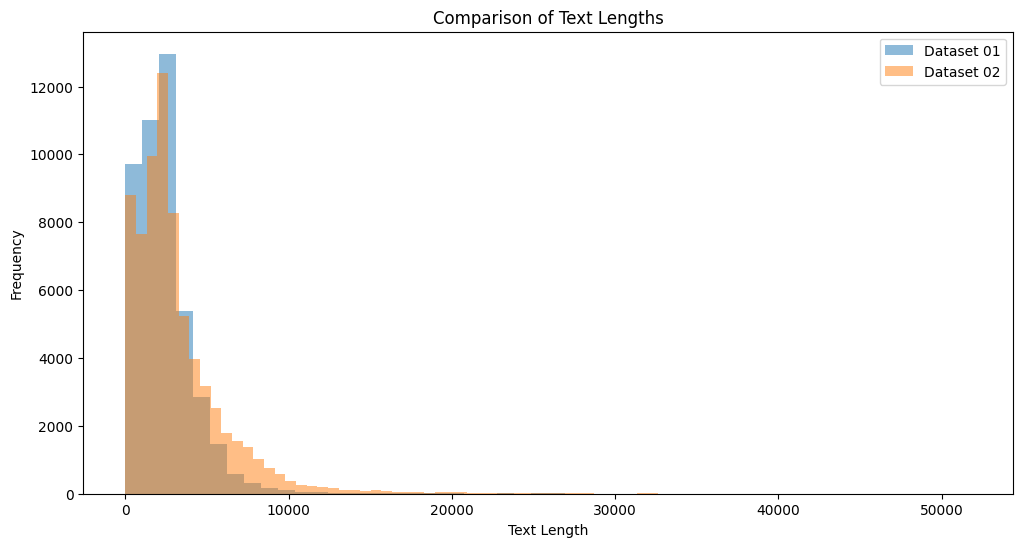

In [43]:
# Load the cleaned datasets
dataset_01 = pd.read_csv('./raw-data/dataset-01.csv')
dataset_02 = pd.read_csv('./raw-data/dataset-02.csv')

# Example: Compare article lengths
dataset_01['text_length'] = dataset_01['text'].apply(len)
dataset_02['text_length'] = dataset_02['text'].apply(len)

# Plotting the distributions of text lengths
plt.figure(figsize=(12, 6))
plt.hist(dataset_01['text_length'], bins=50, alpha=0.5, label='Dataset 01')
plt.hist(dataset_02['text_length'], bins=50, alpha=0.5, label='Dataset 02')
plt.title('Comparison of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [44]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.5.0
Datetime: 2024-05-28 16:22:59
Python Version: 3.12.1
-----------------------------------
